In [14]:
import THONKtools as THONK
import numpy as np
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp
import matplotlib.pylab as plt

In [2]:
data=pd.read_csv('measurements',delimiter='\t',index_col=None)

In [3]:
data

,height,frequency
0,12.2,3622
1,13.5,3618
2,15.6,3612
3,18.6,3611
4,21.6,3611
5,24.0,3610
6,26.8,3608
7,28.5,3608
8,29.9,3607
9,31.1,3607


In [7]:
import numpy as np

with open ('measurements','r') as myfile:
    dat=myfile.read().replace(',','.').replace('\n',',').replace('	',',')

datarray = dat.split(',')[2:]
array = np.array([float(i) for i in datarray[:-1]])

In [8]:
print(array)

[  12.2 3622.    13.5 3618.    15.6 3612.    18.6 3611.    21.6 3611.
   24.  3610.    26.8 3608.    28.5 3608.    29.9 3607.    31.1 3607. ]


In [11]:
high=array[0::4]
f=array[1::2]
low=array[2::4]

In [4]:
print(data.height[0::2])
height=np.array([12.2,15.6,21.6,26.8])

0    12.2
2    15.6
4    21.6
6    26.8
8    29.9
Name: height, dtype: float64


In [5]:
THONK.linreg(data.height,data.frequency)
plt.show()

KeyError: -1

In [25]:
THONK.mean(data.frequency)

3611.8888888888887

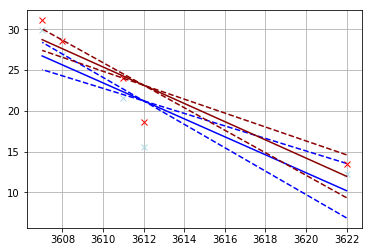

In [19]:
plt.plot(f[0::2],high,'x',color='lightblue')
THONK.linreg(f[0::2],high,color='blue')
plt.plot(f[0::2],low,'x',color='red')
THONK.linreg(f[0::2],low,color='darkred')
plt.grid()
plt.show()